In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the tweets dataset into a pandas DataFrame
df = pd.read_csv("tweets_citilink.csv")

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

         userId         username                       date  \
0  1.913150e+09  RKevin_Ramdhani  2023-06-26 23:48:12+00:00   
1  5.945261e+08    richartavicho  2023-06-26 22:10:23+00:00   
2  1.330470e+18          fwhelve  2023-06-26 17:40:36+00:00   
3  1.330470e+18          fwhelve  2023-06-26 17:36:45+00:00   
4  3.435242e+09     ArwahMiliter  2023-06-26 16:29:53+00:00   

                                             content       tweetId  \
0  Trip Jakarta - Kuala Lumpur bersama Citilink d...  1.673480e+18   
1                     @becak_e @Citilink ah gak juga  1.673450e+18   
2  @yourrrrmineeeee Citilink skrg lg 1,9 ke bali🙂...  1.673390e+18   
3  @yourrrrmineeeee IYAA! aku biasa 1jt udh dpt c...  1.673380e+18   
4  @Hilmi28 Jaman Bandara Husein masih ramai, rut...  1.673370e+18   

   replyCount  retweetCount  likeCount    inReplyToUser  \
0           0             0          1              NaN   
1           0             0          0          becak_e   
2           1          

In [ ]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          2297 non-null   float64
 1   username        2297 non-null   object 
 2   date            2297 non-null   object 
 3   content         2297 non-null   object 
 4   tweetId         2297 non-null   float64
 5   replyCount      2297 non-null   int64  
 6   retweetCount    2297 non-null   int64  
 7   likeCount       2297 non-null   int64  
 8   inReplyToUser   1082 non-null   object 
 9   mentionedUsers  1443 non-null   object 
 10  hashtags        117 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 197.5+ KB
None


In [ ]:
# Descriptive statistics of numerical columns
numerical_columns = df.select_dtypes(include='number').drop(columns=['userId', 'tweetId'])
print(numerical_columns.describe())

        replyCount  retweetCount    likeCount
count  2297.000000   2297.000000  2297.000000
mean      0.685242      0.456683     2.103178
std       4.218831      8.380279    28.386277
min       0.000000      0.000000     0.000000
25%       0.000000      0.000000     0.000000
50%       0.000000      0.000000     0.000000
75%       1.000000      0.000000     0.000000
max     165.000000    319.000000  1066.000000


In [ ]:
#explore username
top_usernames = df['username'].value_counts().head(10)
print(top_usernames)

dishub_bwi        31
contactap2        28
raja_trip         20
xranixm           11
Febyelsiana       11
doditred          10
detikTravel        9
ArwahMiliter       9
Alfianwisnu087     9
eddupedia          8
Name: username, dtype: int64


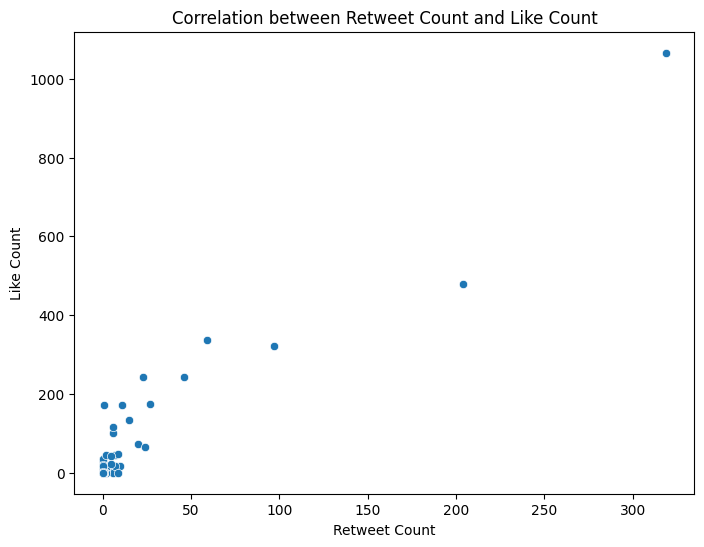

In [ ]:
# Visualize the correlation between retweet count and like count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='retweetCount', y='likeCount')
plt.title('Correlation between Retweet Count and Like Count')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.show()

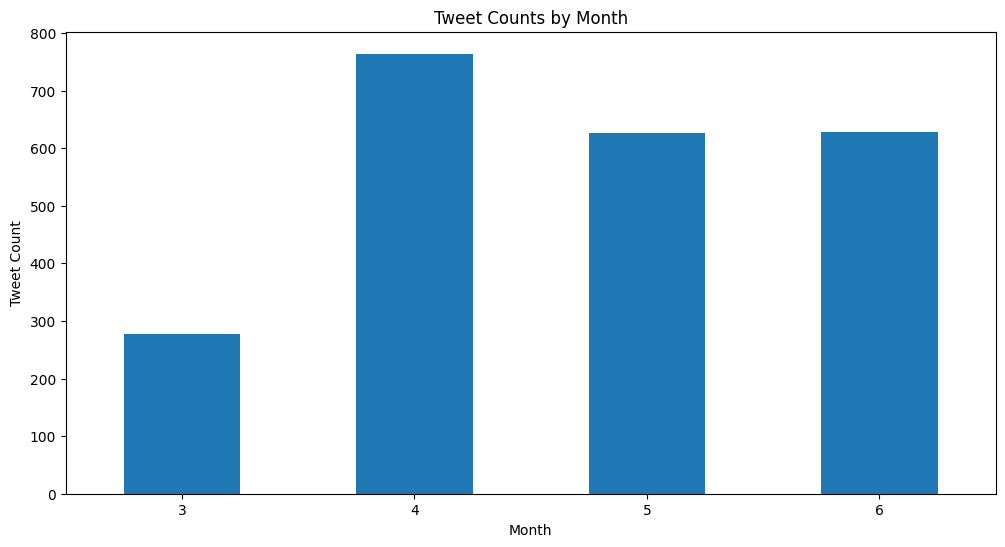

In [ ]:
# Generate a histogram of tweet counts by month
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['month'] = df['date'].dt.month  # Extract month from the 'date' column
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Tweet Counts by Month')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Explore inReplyToUser
top_in_reply_to_users = df['inReplyToUser'].value_counts().head(10)
print(top_in_reply_to_users)

Citilink           71
tanyakanrl         56
indoflyer          28
biasalahanakmud    20
kegblgnunfaedh     13
hrdbacot           13
dhingdhongg        12
discountfess       11
Alfianwisnu087     10
convomf            10
Name: inReplyToUser, dtype: int64


In [ ]:
# Explore mentionedUsers
mentionedUsers = df['mentionedUsers'].str.lower().str.split(',')
mentionedUsers = mentionedUsers.explode().str.strip()
mentionedUsers = mentionedUsers.str.replace(r'\[|\]', '')  # Remove square brackets
top_mentionedUsers = mentionedUsers.value_counts().head(10)
print(top_mentionedUsers)

'citilink'           709
'tanyakanrl'          98
'indonesiagaruda'     53
'indoflyer'           46
'dhingdhongg'         25
'kegblgnunfaedh'      24
'biasalahanakmud'     22
'kemenhub151'         21
'batikairina'         21
'discountfess'        19
Name: mentionedUsers, dtype: int64


<ipython-input-105-70b53fb11118>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  mentionedUsers = mentionedUsers.str.replace(r'\[|\]', '')  # Remove square brackets


In [ ]:
# Explore hashtags
hashtags = df['hashtags'].str.lower().str.split(',')
hashtags = hashtags.explode().str.strip()
hashtags = hashtags.str.replace(r'\[|\]', '')  # Remove square brackets
top_hashtags = hashtags.value_counts().head(10)
print(top_hashtags)

'citilink'           31
'zonauang'           19
'zonajajan'          17
'tiketpesawat'       15
'flightaware'        10
'garudaindonesia'     8
'jakarta'             6
'update'              5
'batam'               5
'aviationlovers'      4
Name: hashtags, dtype: int64


<ipython-input-106-27c308d0284c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  hashtags = hashtags.str.replace(r'\[|\]', '')  # Remove square brackets
